In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_columns' , None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3,2,2,2.0,new property,850.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8597.0,2,2,2,4.0,new property,1226.0,1,1,0,0,0,0,38
2,flat,breez global hill view,sohna road,0.32,5470.0,2,2,1,17.0,new property,1000.0,0,0,0,0,0,0,49
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3,4,3+,10.0,relatively new,1615.0,0,1,0,0,1,1,174
4,flat,suncity avenue,sector 102,0.48,9023.0,2,2,1,5.0,relatively new,582.0,0,0,1,0,0,0,159


In [5]:
df.shape

(3576, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3576 non-null   object 
 1   society          3575 non-null   object 
 2   sector           3576 non-null   object 
 3   price            3576 non-null   float64
 4   price_per_sqft   3576 non-null   float64
 5   bedRoom          3576 non-null   int64  
 6   bathroom         3576 non-null   int64  
 7   balcony          3576 non-null   object 
 8   floorNum         3576 non-null   float64
 9   agePossession    3576 non-null   object 
 10  built_up_area    3576 non-null   float64
 11  study room       3576 non-null   int64  
 12  servant room     3576 non-null   int64  
 13  store room       3576 non-null   int64  
 14  pooja room       3576 non-null   int64  
 15  others           3576 non-null   int64  
 16  furnishing_type  3576 non-null   int64  
 17  luxury_score  

In [7]:
df.duplicated().sum()

3

In [8]:
df.drop_duplicates(inplace = True)

<Axes: >

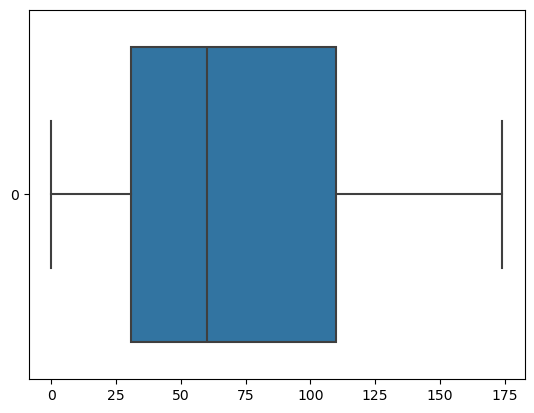

In [9]:
sns.boxplot(df['luxury_score'],orient = 'h')

In [10]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [11]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3,2,2,2.0,new property,850.0,0,0,0,0,0,0,8
1,flat,sector 89,0.95,2,2,2,4.0,new property,1226.0,1,1,0,0,0,0,38
2,flat,sohna road,0.32,2,2,1,17.0,new property,1000.0,0,0,0,0,0,0,49
3,flat,sector 92,1.60,3,4,3+,10.0,relatively new,1615.0,0,1,0,0,1,1,174
4,flat,sector 102,0.48,2,2,1,5.0,relatively new,582.0,0,0,1,0,0,0,159


In [12]:
def luxury_score_cat(x):
    if 0<=x<50:
        return "Low"
    elif 50<=x<150:
        return "Medium"
    elif 150<=x<=175:
        return "High"
    else:
        return None

In [13]:
train_df['luxury_category'] = train_df.luxury_score.apply(luxury_score_cat)

In [14]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3,2,2,2.0,new property,850.0,0,0,0,0,0,0,8,Low
1,flat,sector 89,0.95,2,2,2,4.0,new property,1226.0,1,1,0,0,0,0,38,Low
2,flat,sohna road,0.32,2,2,1,17.0,new property,1000.0,0,0,0,0,0,0,49,Low
3,flat,sector 92,1.60,3,4,3+,10.0,relatively new,1615.0,0,1,0,0,1,1,174,High
4,flat,sector 102,0.48,2,2,1,5.0,relatively new,582.0,0,0,1,0,0,0,159,High


<Axes: >

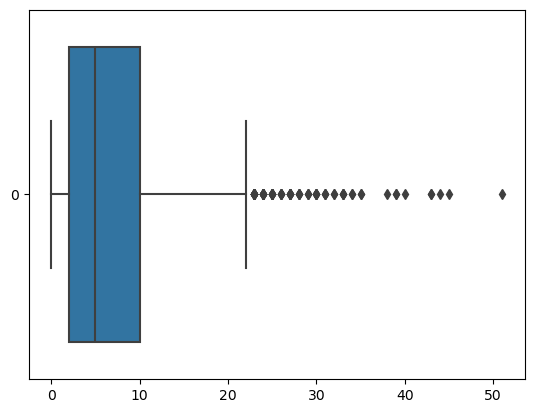

In [15]:
sns.boxplot(df['floorNum'],orient = 'h')

In [16]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None

In [17]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [18]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 36,0.82,3,2,2,2.0,new property,850.0,0,0,0,0,0,0,8,Low,Low Floor
1,flat,sector 89,0.95,2,2,2,4.0,new property,1226.0,1,1,0,0,0,0,38,Low,Mid Floor
2,flat,sohna road,0.32,2,2,1,17.0,new property,1000.0,0,0,0,0,0,0,49,Low,High Floor
3,flat,sector 92,1.60,3,4,3+,10.0,relatively new,1615.0,0,1,0,0,1,1,174,High,Mid Floor
4,flat,sector 102,0.48,2,2,1,5.0,relatively new,582.0,0,0,1,0,0,0,159,High,Mid Floor


In [19]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [20]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

In [21]:
categorical_cols = train_df.select_dtypes(include = ['object']).columns

In [22]:
categorical_cols

Index(['property_type', 'sector', 'balcony', 'agePossession',
       'luxury_category', 'floor_category'],
      dtype='object')

In [23]:
data_label_encoded[categorical_cols]

,property_type,sector,balcony,agePossession,luxury_category,floor_category
0,flat,sector 36,2,new property,Low,Low Floor
1,flat,sector 89,2,new property,Low,Mid Floor
2,flat,sohna road,1,new property,Low,High Floor
3,flat,sector 92,3+,relatively new,High,Mid Floor
4,flat,sector 102,1,relatively new,High,Mid Floor
...,...,...,...,...,...,...
3571,flat,sector 84,1,relatively new,Medium,Mid Floor
3572,house,sector 109,3+,relatively new,High,Low Floor
3573,flat,sector 2,1,moderately old,Medium,Mid Floor
3574,house,sector 43,3,moderately old,Medium,Mid Floor


In [24]:
oe = OrdinalEncoder()

In [25]:
data_label_encoded[categorical_cols] = oe.fit_transform(data_label_encoded[categorical_cols])

In [26]:
oe.categories_

[array(['flat', 'house'], dtype=object),
 array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
        'sector 102', 'sector 103', 'sector 104', 'sector 105',
        'sector 106', 'sector 107', 'sector 108', 'sector 109',
        'sector 10a', 'sector 11', 'sector 110', 'sector 111',
        'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
        'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
        'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
        'sector 26', 'sector 27', 'sector 28', 'sector 3',
        'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
        'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
        'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
        'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
        'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
        'sector 51', 'sector 52', 'sector 53', 'sector 5

In [27]:
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

In [28]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,40.0,3,2,2.0,1.0,850.0,0,0,0,0,0,0,1.0,1.0
1,0.0,101.0,2,2,2.0,1.0,1226.0,1,1,0,0,0,0,1.0,2.0
2,0.0,111.0,2,2,1.0,1.0,1000.0,0,0,0,0,0,0,1.0,0.0
3,0.0,105.0,3,4,4.0,3.0,1615.0,0,1,0,0,1,1,0.0,2.0
4,0.0,4.0,2,2,1.0,3.0,582.0,0,0,1,0,0,0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,0.0,96.0,2,2,1.0,3.0,532.0,0,0,0,0,0,0,2.0,2.0
3572,1.0,11.0,5,5,4.0,3.0,6228.0,1,1,1,1,0,0,0.0,1.0
3573,0.0,25.0,1,1,1.0,0.0,665.0,0,0,0,0,0,1,2.0,2.0
3574,1.0,50.0,5,6,3.0,0.0,5490.0,1,1,1,1,0,0,2.0,2.0


In [29]:
y_label

0        0.82
1        0.95
2        0.32
3        1.60
4        0.48
        ...  
3571     0.37
3572     6.00
3573     0.60
3574    15.50
3575     1.78
Name: price, Length: 3573, dtype: float64

<Axes: >

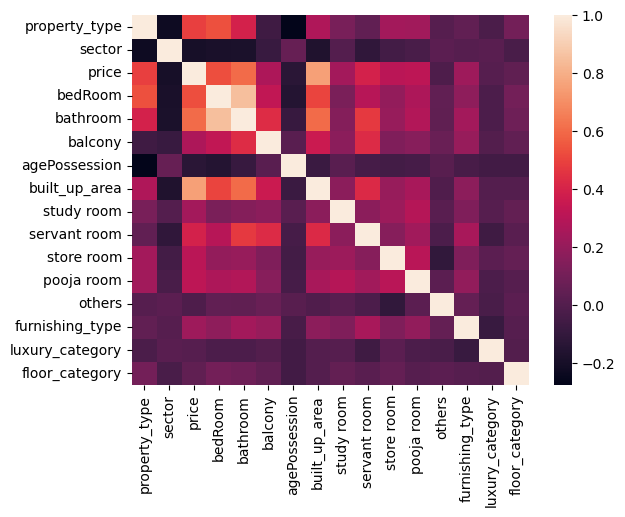

In [30]:
 sns.heatmap(data_label_encoded.corr())

In [31]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.197942
1,price,1.000000
2,bedRoom,0.529236
3,bathroom,0.605981
4,balcony,0.271617
5,agePossession,-0.130543
6,built_up_area,0.753381
7,study room,0.242990
8,servant room,0.394237
9,store room,0.310847


In [32]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators= 100 , random_state= 42)
model.fit(X_label , y_label)

fi_df2 = pd.DataFrame({
    'feature':X_label.columns , 
    'rf_importance': model.feature_importances_
})

In [33]:
fi_df2.sort_values(by = 'rf_importance' , ascending = False)

,feature,rf_importance
6,built_up_area,0.658788
1,sector,0.104674
0,property_type,0.096341
3,bathroom,0.022708
2,bedRoom,0.020586
8,servant room,0.020310
5,agePossession,0.013837
4,balcony,0.011835
12,furnishing_type,0.009973
9,store room,0.009614


In [34]:
from sklearn.ensemble import GradientBoostingRegressor

model2 = GradientBoostingRegressor()
model2.fit(X_label , y_label)

fi_df3 = pd.DataFrame({
    'feature':X_label.columns,
    'gb_importance':model2.feature_importances_
}).sort_values(by = 'gb_importance' , ascending = False)

In [35]:
fi_df3

,feature,gb_importance
6,built_up_area,0.692571
1,sector,0.107892
0,property_type,0.090370
3,bathroom,0.034134
8,servant room,0.028658
2,bedRoom,0.023267
9,store room,0.010694
5,agePossession,0.003983
12,furnishing_type,0.002693
7,study room,0.002645


In [36]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label , X_test_label , y_train_label , y_test_label = train_test_split(X_label , y_label , test_size = 0.2 , random_state= 42)

In [37]:
model3 = RandomForestRegressor(n_estimators= 100 , random_state= 42)
model3.fit(X_train_label , y_train_label)

perm_importance = permutation_importance(model3 , X_test_label ,y_test_label , n_repeats= 30 , random_state= 42 )

fi_df = pd.DataFrame({
    'feature':X_label.columns,
    'perm_importance':perm_importance.importances_mean
}).sort_values(by = 'perm_importance',ascending = False)

In [38]:
fi_df

,feature,perm_importance
6,built_up_area,0.731592
0,property_type,0.161992
1,sector,0.157683
8,servant room,0.029864
5,agePossession,0.008783
2,bedRoom,0.007014
4,balcony,0.005083
3,bathroom,0.004237
9,store room,0.001570
14,floor_category,0.000253


In [39]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.552544
0,property_type,0.759041
3,bathroom,0.455780
9,store room,0.201422
7,study room,0.168021
12,furnishing_type,0.166490
8,servant room,0.139679
10,pooja room,0.080352
13,luxury_category,0.059436
5,agePossession,-0.000000


In [40]:
X_label.shape[1]

15

In [41]:
from sklearn.feature_selection import RFE

model4 = RandomForestRegressor()

# RFE
selector_label = RFE(model4 , n_features_to_select= X_label.shape[1] , step = 1)
selector_label = selector_label.fit(X_label , y_label)

selected_features = X_label.columns[selector_label.support_]

selected_coef = selector_label.estimator_.feature_importances_


fi_d6 = pd.DataFrame(
    {
        'feature':selected_features ,
        'rfe_score':selected_coef
    }
).sort_values(by = 'rfe_score' , ascending = False)


In [42]:
fi_d6

,feature,rfe_score
6,built_up_area,0.660427
1,sector,0.104803
0,property_type,0.093334
2,bedRoom,0.022550
3,bathroom,0.022263
8,servant room,0.019997
5,agePossession,0.015354
4,balcony,0.012275
12,furnishing_type,0.010985
9,store room,0.008460


In [43]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.554320
0,property_type,0.777350
3,bathroom,0.530996
9,store room,0.204309
12,furnishing_type,0.175508
7,study room,0.174889
8,servant room,0.140014
10,pooja room,0.085313
13,luxury_category,0.070346
5,agePossession,-0.003761


In [44]:
!pip install shap

In [45]:
import shap

rf = RandomForestRegressor(n_estimators = 100 , random_state = 42)
rf.fit(X_label , y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)
shap_sum = np.abs(shap_values).mean(axis=0)
shap_values


array([[-0.17672188,  0.12262783, -0.0160357 , ..., -0.01372004,
        -0.00521717, -0.0081161 ],
       [-0.18753822, -0.3752056 , -0.0371789 , ..., -0.01259862,
        -0.00602089, -0.00426885],
       [-0.16188774, -0.42869691, -0.02995294, ..., -0.0145353 ,
        -0.01027777, -0.00803568],
       ...,
       [-0.16883136,  0.06670046, -0.00614093, ...,  0.00776543,
         0.01932729, -0.00765079],
       [ 1.49811429,  1.2682869 ,  0.33604941, ...,  0.12107708,
         0.03410081,  0.08587195],
       [-0.29960065,  0.00812731, -0.01261687, ...,  0.01101787,
        -0.00904601,  0.03453847]])

In [46]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.280626
0,property_type,0.458691
1,sector,0.387771
8,servant room,0.098292
3,bathroom,0.094680
2,bedRoom,0.042594
4,balcony,0.039832
12,furnishing_type,0.030351
5,agePossession,0.025956
14,floor_category,0.025624


In [55]:
merged_final = fi_df1.merge(fi_df2 , on = 'feature').merge(fi_df3).merge(fi_df).merge(fi_df5).merge(fi_d6).merge(fi_df7).merge(fi_df8).set_index('feature')

In [56]:
merged_final

,corr_coeff,rf_importance,gb_importance,perm_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.197942,0.104674,0.107892,0.157683,-0.049007,0.104803,-0.058243,0.387771
bedRoom,0.529236,0.020586,0.023267,0.007014,-0.242534,0.022550,-0.326371,0.042594
bathroom,0.605981,0.022708,0.034134,0.004237,0.455780,0.022263,0.530996,0.094680
balcony,0.271617,0.011835,0.001201,0.005083,-0.028846,0.012275,-0.047356,0.039832
agePossession,-0.130543,0.013837,0.003983,0.008783,-0.000000,0.015354,-0.003761,0.025956
built_up_area,0.753381,0.658788,0.692571,0.731592,1.552544,0.660427,1.554320,1.280626
study room,0.242990,0.007433,0.002645,-0.003097,0.168021,0.007078,0.174889,0.017566
servant room,0.394237,0.020310,0.028658,0.029864,0.139679,0.019997,0.140014,0.098292
store room,0.310847,0.009614,0.010694,0.001570,0.201422,0.008460,0.204309,0.019642


In [61]:
merged_final.sum(axis = 0)

corr_coeff         3.375349
rf_importance      0.903659
gb_importance      0.909630
perm_importance    0.934875
lasso_coeff        2.489023
rfe_score          0.906666
reg_coeffs         2.467726
SHAP_score         2.101923
dtype: float64

In [67]:
merged_final

,corr_coeff,rf_importance,gb_importance,perm_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.197942,0.104674,0.107892,0.157683,-0.049007,0.104803,-0.058243,0.387771
bedRoom,0.529236,0.020586,0.023267,0.007014,-0.242534,0.022550,-0.326371,0.042594
bathroom,0.605981,0.022708,0.034134,0.004237,0.455780,0.022263,0.530996,0.094680
balcony,0.271617,0.011835,0.001201,0.005083,-0.028846,0.012275,-0.047356,0.039832
agePossession,-0.130543,0.013837,0.003983,0.008783,-0.000000,0.015354,-0.003761,0.025956
built_up_area,0.753381,0.658788,0.692571,0.731592,1.552544,0.660427,1.554320,1.280626
study room,0.242990,0.007433,0.002645,-0.003097,0.168021,0.007078,0.174889,0.017566
servant room,0.394237,0.020310,0.028658,0.029864,0.139679,0.019997,0.140014,0.098292
store room,0.310847,0.009614,0.010694,0.001570,0.201422,0.008460,0.204309,0.019642


In [68]:
-0.197942/ 3.375349

-0.05864341731773515

In [69]:
# NORMALIZING SCORE
merged_final = merged_final.divide(merged_final.sum(axis = 0),axis = 1)

In [70]:
merged_final

,corr_coeff,rf_importance,gb_importance,perm_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.058644,0.115834,0.118610,0.168667,-0.019689,0.115591,-0.023602,0.184484
bedRoom,0.156795,0.022781,0.025578,0.007503,-0.097441,0.024871,-0.132256,0.020264
bathroom,0.179531,0.025129,0.037525,0.004532,0.183116,0.024554,0.215176,0.045044
balcony,0.080471,0.013096,0.001320,0.005437,-0.011589,0.013539,-0.019190,0.018950
agePossession,-0.038675,0.015312,0.004379,0.009395,-0.000000,0.016935,-0.001524,0.012349
built_up_area,0.223201,0.729022,0.761377,0.782556,0.623756,0.728412,0.629859,0.609264
study room,0.071989,0.008225,0.002907,-0.003312,0.067505,0.007807,0.070870,0.008357
servant room,0.116799,0.022476,0.031505,0.031945,0.056118,0.022055,0.056738,0.046763
store room,0.092093,0.010639,0.011757,0.001680,0.080924,0.009331,0.082792,0.009345


considering only tree based models , as we used ordinal encoder which is not the best choice for Linear models

In [76]:
merged_final[['rf_importance','gb_importance',	'perm_importance','rfe_score','SHAP_score']].mean(axis = 1).sort_values(ascending = False)

feature
built_up_area      0.722126
sector             0.140637
servant room       0.030949
bathroom           0.027357
bedRoom            0.020199
agePossession      0.011674
balcony            0.010469
store room         0.008550
furnishing_type    0.007289
floor_category     0.005162
study room         0.004797
luxury_category    0.004737
pooja room         0.003938
others             0.002116
dtype: float64

In [91]:
# to drop pooja room, study room, others
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators= 100 , random_state=42)

scores = cross_val_score(rf ,X_label , y_label , cv = 5 , scoring = 'r2' )

In [92]:
scores

array([0.84854246, 0.82004999, 0.81703938, 0.79669888, 0.82341627])

In [93]:
scores.mean()

0.8211493973502606

In [94]:
scores.std()

0.016561685886701937

In [95]:
X_label2 = X_label.drop(columns=['pooja room', 'study room', 'others'])

In [96]:
X_label2.columns

Index(['property_type', 'sector', 'bedRoom', 'bathroom', 'balcony',
       'agePossession', 'built_up_area', 'servant room', 'store room',
       'furnishing_type', 'luxury_category', 'floor_category'],
      dtype='object')

In [97]:

rf = RandomForestRegressor(n_estimators= 100 , random_state=42)

scores2 = cross_val_score(rf ,X_label2 , y_label , cv = 5 , scoring = 'r2' )

In [98]:
scores2

array([0.84571358, 0.81407103, 0.81260226, 0.80090445, 0.82971492])

In [99]:
scores2.mean()

0.820601247872206

In [87]:
scores.std()

0.016561685886701937

In [89]:
updated_df = X_label2
updated_df['price'] = y_label

In [90]:
updated_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,40.0,3,2,2.0,1.0,850.0,0,0,0,1.0,1.0,0.82
1,0.0,101.0,2,2,2.0,1.0,1226.0,1,0,0,1.0,2.0,0.95
2,0.0,111.0,2,2,1.0,1.0,1000.0,0,0,0,1.0,0.0,0.32
3,0.0,105.0,3,4,4.0,3.0,1615.0,1,0,1,0.0,2.0,1.60
4,0.0,4.0,2,2,1.0,3.0,582.0,0,1,0,0.0,2.0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,0.0,96.0,2,2,1.0,3.0,532.0,0,0,0,2.0,2.0,0.37
3572,1.0,11.0,5,5,4.0,3.0,6228.0,1,1,0,0.0,1.0,6.00
3573,0.0,25.0,1,1,1.0,0.0,665.0,0,0,1,2.0,2.0,0.60
3574,1.0,50.0,5,6,3.0,0.0,5490.0,1,1,0,2.0,2.0,15.50


In [100]:
updated_df.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,40.0,3,2,2.0,1.0,850.0,0,0,0,1.0,1.0,0.82
1,0.0,101.0,2,2,2.0,1.0,1226.0,1,0,0,1.0,2.0,0.95
2,0.0,111.0,2,2,1.0,1.0,1000.0,0,0,0,1.0,0.0,0.32
3,0.0,105.0,3,4,4.0,3.0,1615.0,1,0,1,0.0,2.0,1.60
4,0.0,4.0,2,2,1.0,3.0,582.0,0,1,0,0.0,2.0,0.48


In [101]:
updated_df.to_csv('gurgaon_data_after_feature_selection.csv' , index = False)